# Preprocessing Data

## Table of Contents
1. [Import Libraries](#import-libraries)
2. [Exploratory Data Analysis (EDA)](#eda)
    - 2.1. [Load Dataset](#load-dataset)
    - 2.2. [Dataset Overview](#dataset-overview)
    - 2.3. [Raw Data Visualization](#raw-data-visualization)
3. [Data Preprocessing](#data-preprocessing)
    - 3.1. [Check and Handle Invalid/Missing Values](#handle-missing)
    - 3.2. [Train/Test Split](#train-test-split)
    - 3.3. [Feature Scaling](#feature-scaling)
    - 3.4. [Save Processed Data](#save-processed-data)
    - 3.5. [Visualization of Processed Data](#processed-data-visualization)

## 1. Import Libraries <a id="import-libraries"></a>
Import all necessary libraries for data analysis and preprocessing.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
import warnings

warnings.simplefilter(action='ignore')
sns.set()
plt.style.use("ggplot")

## 2. Exploratory Data Analysis (EDA) <a id="eda"></a>

### 2.1. Load Dataset <a id="load-dataset"></a>
Load the original diabetes dataset for analysis.

In [3]:
df = pd.read_csv("../../data/raw/diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 2.2. Dataset Overview <a id="dataset-overview"></a>
Get a summary and basic statistics of the dataset.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [8]:
df.corr().Outcome.sort_values()

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64

### 2.3. Raw Data Visualization <a id="raw-data-visualization"></a>
Visualize feature distributions, outliers, and class balance.

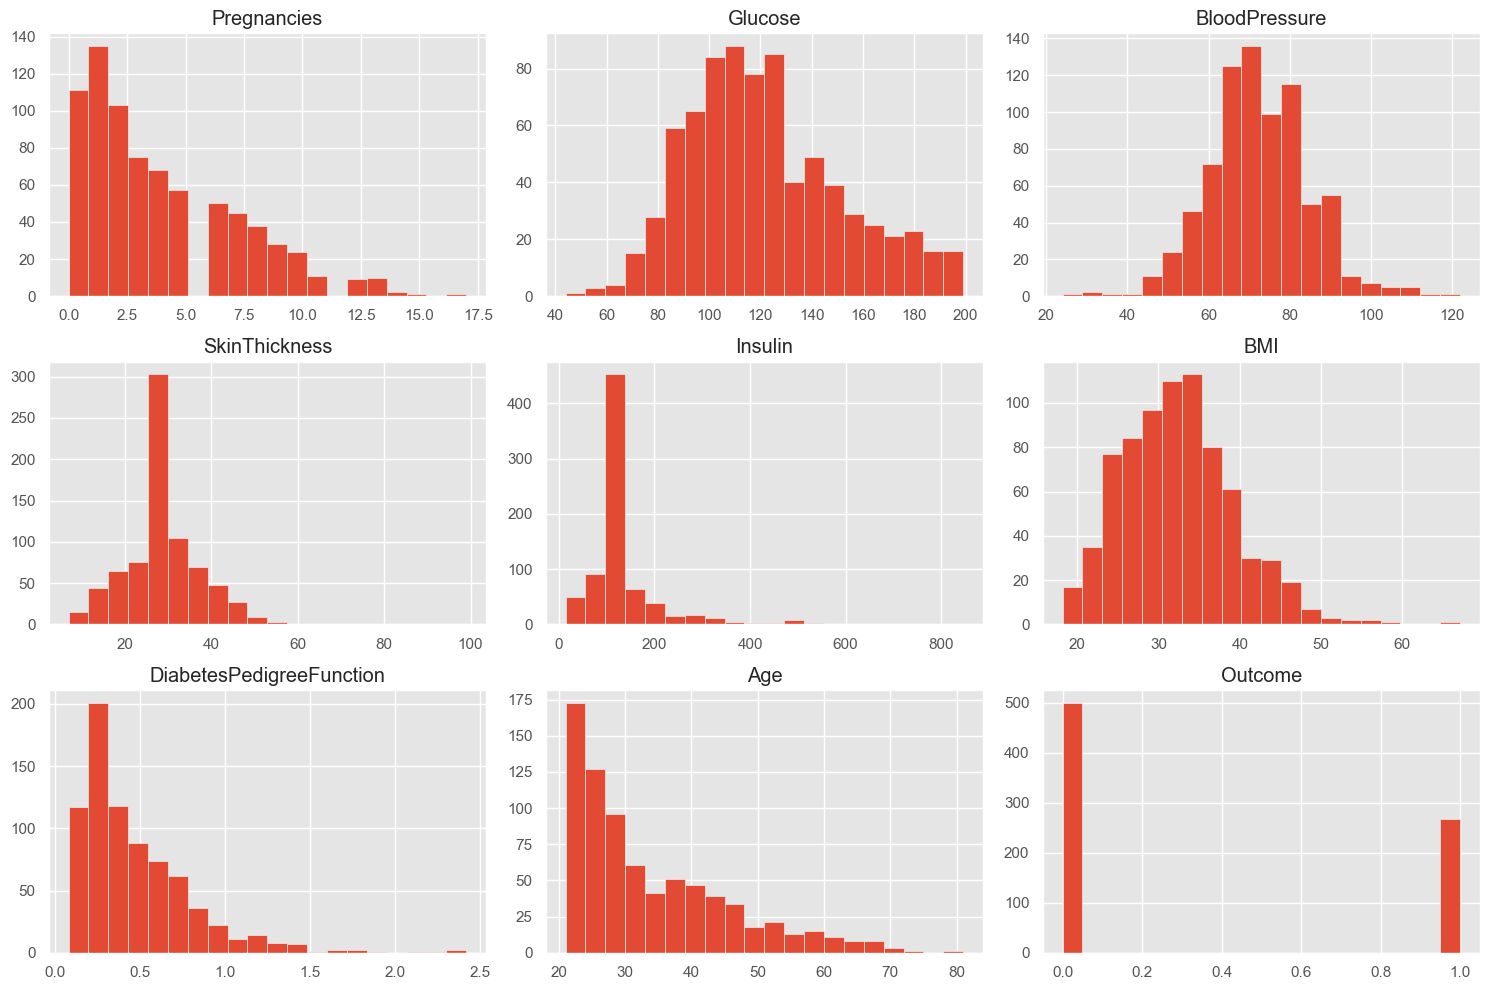

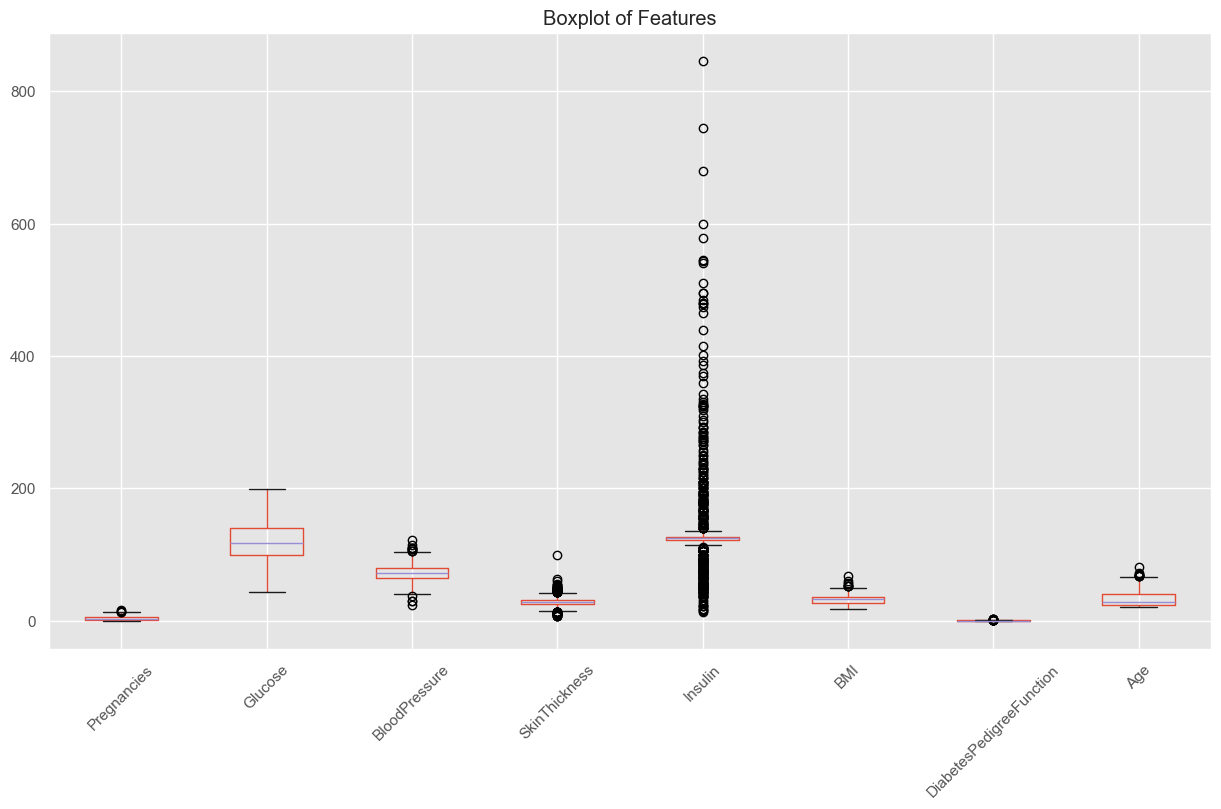

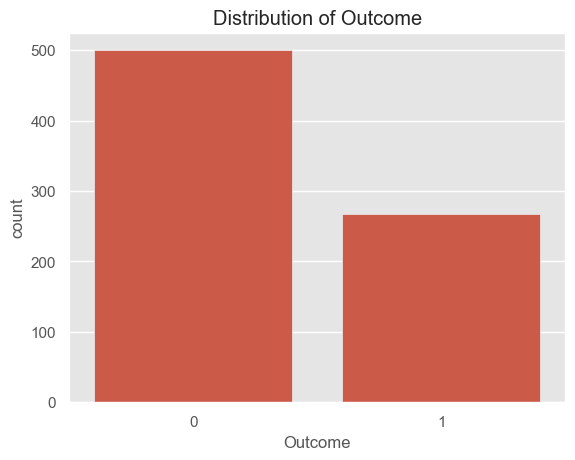

In [30]:
# Histogram for all features
df.hist(figsize=(15,10), bins=20)
plt.tight_layout()
plt.savefig('../../outputs/charts/nb1_histogram_all_features.png', bbox_inches='tight')
plt.show()

# Boxplot for all features
plt.figure(figsize=(15,8))
df.drop('Outcome', axis=1).boxplot()
plt.title('Boxplot of Features')
plt.xticks(rotation=45)
plt.savefig('../../outputs/charts/nb1_boxplot_all_features.png', bbox_inches='tight')
plt.show()

# Countplot for Outcome
ds = df['Outcome']
sns.countplot(x=ds)
plt.title('Distribution of Outcome')
plt.savefig('../../outputs/charts/nb1_countplot_outcome.png', bbox_inches='tight')
plt.show()

## 3. Data Preprocessing <a id="data-preprocessing"></a>

### 3.1. Check and Handle Invalid/Missing Values <a id="handle-missing"></a>
Some columns may contain invalid zero values (e.g., Glucose, BloodPressure, SkinThickness, Insulin, BMI). Replace zeros with NaN and handle missing values appropriately.

In [19]:
cols_with_zero_invalid = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero_invalid] = df[cols_with_zero_invalid].replace(0, pd.NA)
df[cols_with_zero_invalid].isna().sum()

# Fill missing values with median
for col in cols_with_zero_invalid:
    df[col] = df[col].fillna(df[col].median())

### 3.2. Train/Test Split <a id="train-test-split"></a>
Split the dataset into training and testing sets, ensuring the target distribution is preserved.

In [20]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43, stratify=y )

print(f"Train shape: {X_train.shape}, {y_train.shape}")
print(f"Test shape: {X_test.shape}, {y_test.shape}")
print(f"Train label distribution:\n {y_train.value_counts(normalize=True)}")
print(f"Test label distribution:\n {y_test.value_counts(normalize=True)}")

Train shape: (614, 8), (614,)
Test shape: (154, 8), (154,)
Train label distribution:
 Outcome
0    0.651466
1    0.348534
Name: proportion, dtype: float64
Test label distribution:
 Outcome
0    0.649351
1    0.350649
Name: proportion, dtype: float64


### 3.3. Feature Scaling <a id="feature-scaling"></a>
Standardize the features using StandardScaler to improve model performance.

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Mean (train): {X_train_scaled.mean(axis=0)}")
print(f"Std (train): {X_train_scaled.std(axis=0)}")

Mean (train): [ 1.73585359e-17 -1.04151215e-16 -5.93083310e-16 -6.36479649e-17
 -2.31447145e-17  6.82769078e-16 -4.62894290e-17 -2.16981699e-17]
Std (train): [1. 1. 1. 1. 1. 1. 1. 1.]


### 3.4. Save Processed Data <a id="save-processed-data"></a>
Save the processed training and testing data for later use.

In [22]:
pd.DataFrame(X_train_scaled, columns=X_train.columns).to_csv('../../data/processed/X_train_scaled.csv', index=False)
pd.DataFrame(X_test_scaled, columns=X_test.columns).to_csv('../../data/processed/X_test_scaled.csv', index=False)
y_train.to_csv('../../data/processed/y_train.csv', index=False)
y_test.to_csv('../../data/processed/y_test.csv', index=False)

### 3.5. Visualization of Processed Data <a id="processed-data-visualization"></a>
Visualize the scaled features and their correlations.

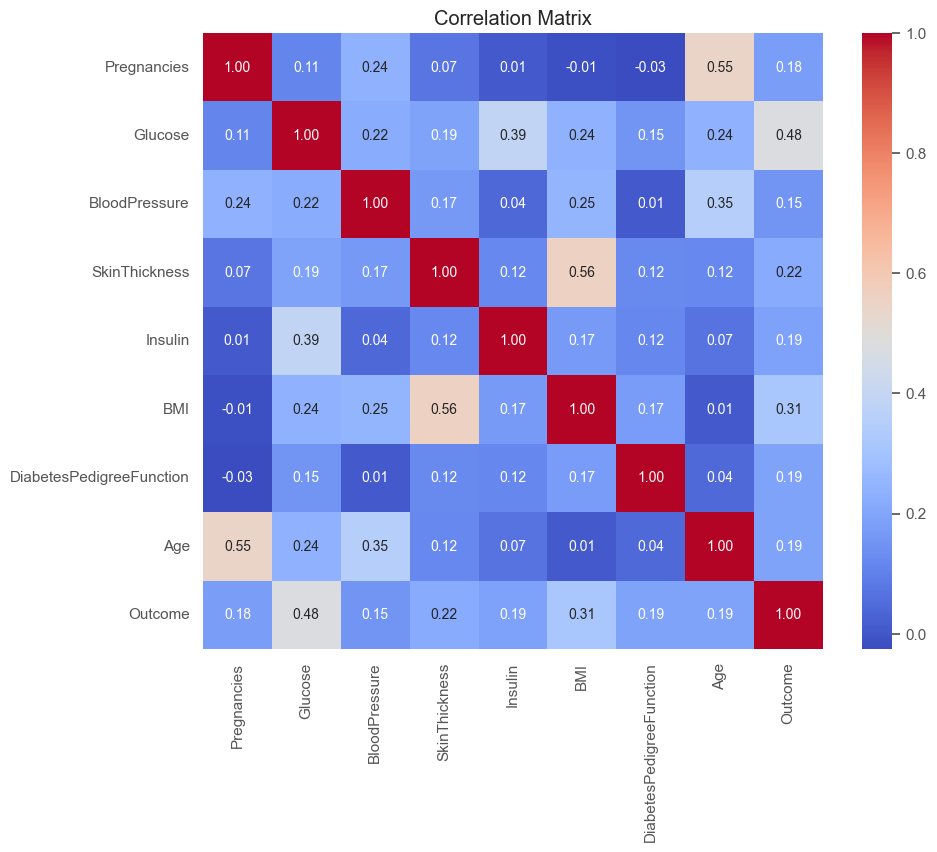

In [29]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

corr = pd.concat([X_train_scaled_df, y_train.reset_index(drop=True)], axis=1).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig('../../outputs/charts/nb1_correlation_matrix.png', bbox_inches='tight')
plt.show()